This notebook obtain the cropped face images of actors from the given dataset.
The dataset is downloaded from the google using Fatkun batch download image (google chrome extension)

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img1 = cv2.imread(r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Actors_dataset\Jayaram\1.jpg")
img1.shape

(366, 300, 3)

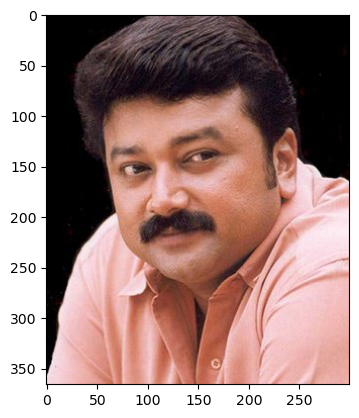

In [14]:
img = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.imshow(img)

Face detection using Cascade Classifier

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[ 31,  76, 186, 186]])

In [16]:
(x,y,w,h) = faces[0]
(x,y,w,h)

(31, 76, 186, 186)

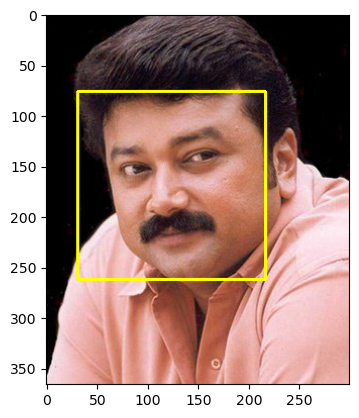

In [17]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(face_img)

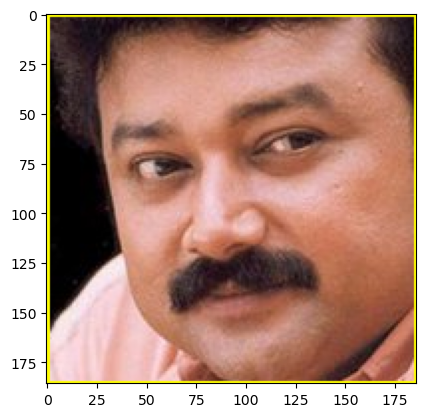

In [18]:
roi_img = img[y:y+h, x:x+w]
plt.imshow(roi_img)

Eye detection

In [19]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

eyes = eye_cascade.detectMultiScale(roi_img)
eyes

array([[35, 56, 42, 42],
       [90, 39, 51, 51]])

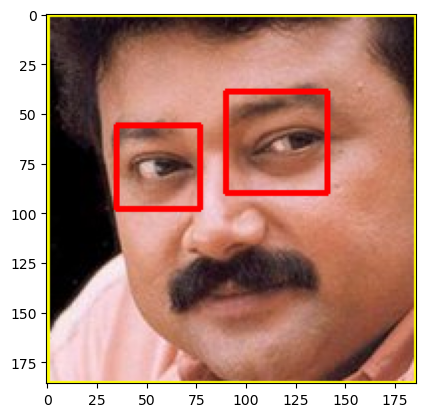

In [20]:
for (ex,ey,ew,eh) in eyes:
   img = cv2.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

plt.imshow(img)

A function to obtain the face region only if two eyes are detected.
Eye detection is also included to obtain clear face for model training.

In [21]:
def get_cropped_image_if_2eyes(img_path):
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
        #roi_img = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >=2:
            return roi_color

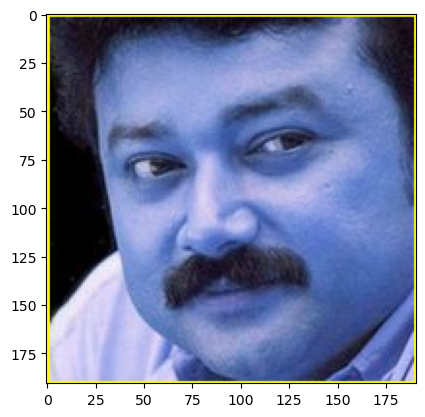

In [22]:
roi_image = get_cropped_image_if_2eyes(r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Actors_dataset\Jayaram\1.jpg")
plt.imshow(roi_image)

In [23]:
class_data = ['Jayaram','Mammootty','Mohanlal','Mukesh']
class_data

['Jayaram', 'Mammootty', 'Mohanlal', 'Mukesh']

This code obtain the cropped faces of all actors and saved the cropped faces in Cropped folder 

In [26]:
import shutil
import os

count=1
parent_dir = r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Actors_dataset"
cropped_dir = r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Actors_dataset\Cropped"

for i in range(0,4):
    actor_dir = parent_dir + '\\'+ class_data[i]
    cropped_actor_dir = cropped_dir + '\\'+ class_data[i]

    if os.path.exists(cropped_actor_dir):
        shutil.rmtree(cropped_actor_dir)
    os.makedirs(cropped_actor_dir)

    for entry in os.scandir(actor_dir):
        roi_img = get_cropped_image_if_2eyes(entry.path)
        if roi_img is not None:
            cropped_file_name = class_data[i] + str(count) + ".png"
            cropped_file_path = cropped_actor_dir + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_img)
        count += 1  

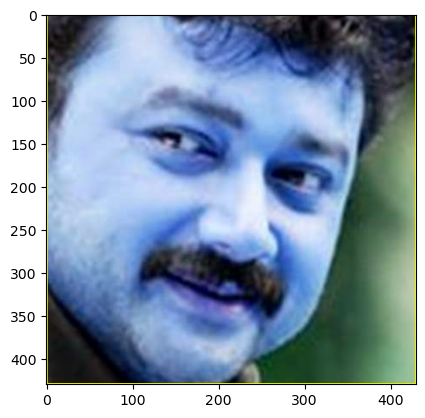

In [27]:
cr_img = cv2.imread(r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Actors_dataset\Cropped\Jayaram\Jayaram1.png")
plt.imshow(cr_img)

Successfully obtained the data for training.